<a href="https://colab.research.google.com/github/romichxd/ds_learning/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [42]:
import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./', download= True, train = True)
MNIST_test = torchvision.datasets.MNIST('./', download= True, train = False)

In [43]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [44]:
X_train = X_train.float()
X_test = X_test.float()

tensor(5)


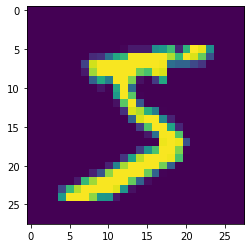

In [45]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
print(y_train[0])

In [46]:
X_train = X_train.reshape([-1,28*28])
X_test = X_test.reshape([-1,28*28])

In [47]:
class MNISTNet(torch.nn.Module):
  def __init__(self, n_hidden_neurons):
    super(MNISTNet,self).__init__()
    self.fc1 = torch.nn.Linear(28*28,n_hidden_neurons)
    self.act1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(n_hidden_neurons,10)

  def forward(self,x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    return x

mnist_net = MNISTNet(100)

In [48]:
torch.cuda.is_available()

True

In [49]:
!nvidia-smi

Sun Sep 25 15:51:39 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    26W /  70W |   1266MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [50]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
mnist_net = mnist_net.to(device)
list(mnist_net.parameters());

In [51]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr = 1.0e-3)

In [55]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(1000):
  order = np.random.permutation(len(X_train))

  for start_index in range(0, len(X_train), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index + batch_size]

    X_batch = X_train[batch_indexes].to(device)
    y_batch = y_train[batch_indexes].to(device)

    preds = mnist_net.forward(X_batch)

    loss_value = loss(preds, y_batch)
    loss_value.backward()

    optimizer.step()

  test_preds = mnist_net.forward(X_test)
  test_loss_history.append(loss(test_preds, y_test))
  accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
  test_accuracy_history.append(accuracy)

  print(accuracy)

tensor(0.9239, device='cuda:0')
tensor(0.9256, device='cuda:0')
tensor(0.9230, device='cuda:0')
tensor(0.9239, device='cuda:0')
tensor(0.9343, device='cuda:0')
tensor(0.9364, device='cuda:0')
tensor(0.9311, device='cuda:0')
tensor(0.9325, device='cuda:0')
tensor(0.9374, device='cuda:0')
tensor(0.9386, device='cuda:0')
tensor(0.9376, device='cuda:0')
tensor(0.9388, device='cuda:0')
tensor(0.9333, device='cuda:0')
tensor(0.9372, device='cuda:0')
tensor(0.9341, device='cuda:0')
tensor(0.9369, device='cuda:0')
tensor(0.9384, device='cuda:0')
tensor(0.9329, device='cuda:0')


KeyboardInterrupt: ignored